In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.ensemble import IsolationForest


def regression_report(y_true,y_pred):
    print('### CLASSIFICATION REPORT ###')
    print(f'MSE:\t{mean_squared_error(y_true,y_pred)}\nRMSE:\t{mean_squared_error(y_true,y_pred)**(1/2)}\nR2:\t{r2_score(y_true,y_pred)}')

In [37]:
df = pd.read_csv('../data/house_prices.csv',usecols=['GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','SalePrice'])
df.head()

,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea,SalePrice
0,856,856,1710,2,548,208500
1,1262,1262,1262,2,460,181500
2,920,920,1786,2,608,223500
3,756,961,1717,3,642,140000
4,1145,1145,2198,3,836,250000


In [38]:
df.isna().sum()

TotalBsmtSF    0
1stFlrSF       0
GrLivArea      0
GarageCars     0
GarageArea     0
SalePrice      0
dtype: int64

In [39]:
x = df.drop('SalePrice',axis=1)
y = df.SalePrice

## Removendo outliers

In [40]:
isolation = IsolationForest(random_state=42)
out_mask = isolation.fit_predict(x,y)
out_mask

array([ 1,  1,  1, ..., -1,  1,  1])

In [41]:
out_mask = pd.Series(out_mask).replace(-1,False).replace(1,True)
out_mask

0        True
1        True
2        True
3        True
4        True
        ...  
1455     True
1456    False
1457    False
1458     True
1459     True
Length: 1460, dtype: bool

In [42]:
x_no_out = x[out_mask]
y_no_out = y[out_mask]

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x_no_out,y_no_out,test_size=0.2,random_state=42)

## Regressão Linear Simples

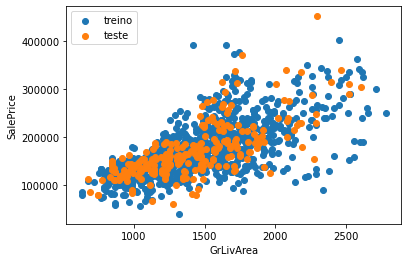

In [44]:
f, ax = plt.subplots()

ax.scatter(x_train.GrLivArea,y_train,color='tab:blue',label='treino')
ax.scatter(x_test.GrLivArea,y_test,color='tab:orange',label='teste')

ax.set_xlabel('GrLivArea')
ax.set_ylabel('SalePrice')

plt.legend()
plt.show()

In [45]:
np.corrcoef(x_train.GrLivArea,y_train)

array([[1.       , 0.6628391],
       [0.6628391, 1.       ]])

In [46]:
x_train.GrLivArea

363      987
1060    1338
469     1710
775     1204
1094     936
        ... 
1262    1788
1327     816
1371    1661
1039     630
1367    1475
Name: GrLivArea, Length: 964, dtype: int64

In [47]:
y_train

363     118000
1060    213500
469     187000
775     162000
1094    129000
         ...  
1262    161500
1327    130500
1371    165500
1039     80000
1367    127000
Name: SalePrice, Length: 964, dtype: int64

In [48]:
lr = LinearRegression()
lr.fit(x_train.GrLivArea.values.reshape(-1,1),y_train)

LinearRegression()

In [49]:
y_pred = lr.predict(x_test.GrLivArea.values.reshape(-1,1))

In [50]:
lr.coef_[0],lr.intercept_

(92.12264801915326, 39335.05590902077)

In [54]:
x = 0

lr.coef_[0] * x + lr.intercept_

39335.05590902077

In [52]:
lr.predict([[1080]])

array([138827.51576971])

In [53]:
regression_report(y_test,y_pred)

### CLASSIFICATION REPORT ###
MSE:	1790439447.99515
RMSE:	42313.58467437083
R2:	0.4867636537558634


## Regressão Linear Múltipla

In [56]:
df.head()

,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea,SalePrice
0,856,856,1710,2,548,208500
1,1262,1262,1262,2,460,181500
2,920,920,1786,2,608,223500
3,756,961,1717,3,642,140000
4,1145,1145,2198,3,836,250000


In [59]:
from sklearn.preprocessing import MinMaxScaler

In [64]:
mx = MinMaxScaler()
x_train_transformed = mx.fit_transform(x_train)

In [67]:
x_test_transformed = mx.transform(x_test)

In [69]:
lr = LinearRegression()
lr.fit(x_train_transformed,y_train)
y_pred = lr.predict(x_test_transformed)

In [70]:
lr.coef_,lr.intercept_

(array([120616.4923411 , -43600.70231096, 146057.68929067,  43511.94388155,
         25351.54845508]),
 54683.155151774)

In [80]:
x_test_transformed

array([[0.48      , 0.42980562, 0.20891365, 0.        , 0.16775885],
       [0.28      , 0.43556515, 0.57474466, 0.5       , 0.42463958],
       [0.81333333, 0.78977682, 0.85236769, 0.5       , 0.5897772 ],
       ...,
       [0.59866667, 0.55795536, 0.2915506 , 0.5       , 0.48230668],
       [0.628     , 0.58963283, 0.31197772, 0.5       , 0.36173001],
       [0.13266667, 0.42980562, 0.52089136, 0.5       , 0.43512451]])

<BarContainer object of 5 artists>

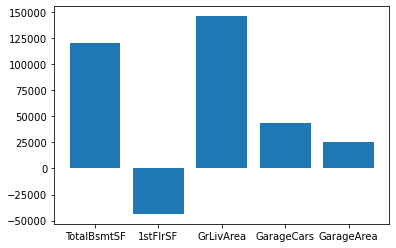

In [79]:
plt.bar(x_train.columns,lr.coef_)

In [86]:
sum((lr.coef_*x_test_transformed[0])) + lr.intercept_

128605.63614799338

In [71]:
regression_report(y_test,y_pred)

### CLASSIFICATION REPORT ###
MSE:	942598641.9583927
RMSE:	30701.769362015486
R2:	0.7298004780250344


## Exemplo Titanic

In [111]:
df = pd.read_csv('../data/titanic.csv')

In [112]:
data = (
    df[['Sex','Pclass','Fare','SibSp','Parch']]
    .dropna()
)

In [113]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [114]:
data['Sex'] = pd.factorize(df.Sex)[0]

In [116]:
x = data.drop('Fare',axis=1)
y = data.Fare

In [117]:
lr = LinearRegression()
lr.fit(x,y)

LinearRegression()

In [118]:
lr.coef_

array([  5.71261765, -33.06546534,   6.05336093,   9.69573153])

In [121]:
col = make_column_transformer(
    (OneHotEncoder(),['Sex','Pclass']),
    remainder='passthrough'
)

col

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(),
                                 ['Sex', 'Pclass'])])

In [123]:
x

,Sex,Pclass,SibSp,Parch
0,0,3,1,0
1,1,1,1,0
2,1,3,0,0
3,1,1,1,0
4,0,3,0,0
...,...,...,...,...
886,0,2,0,0
887,1,1,0,0
888,1,3,1,2
889,0,1,0,0


In [128]:
new_x = pd.DataFrame(col.fit_transform(x),columns=col.get_feature_names())
new_x.head()

,onehotencoder__x0_0,onehotencoder__x0_1,onehotencoder__x1_1,onehotencoder__x1_2,onehotencoder__x1_3,SibSp,Parch
0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [127]:
lr.fit(new_x,y)
lr.coef_

array([ -3.37685749,   3.37685749,  44.8258885 , -18.67373367,
       -26.15215483,   5.52254736,   9.88145739])

In [133]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

In [140]:
model = DecisionTreeRegressor(max_depth=2).fit(x,y)

In [143]:
x

,Sex,Pclass,SibSp,Parch
0,0,3,1,0
1,1,1,1,0
2,1,3,0,0
3,1,1,1,0
4,0,3,0,0
...,...,...,...,...
886,0,2,0,0
887,1,1,0,0
888,1,3,1,2
889,0,1,0,0


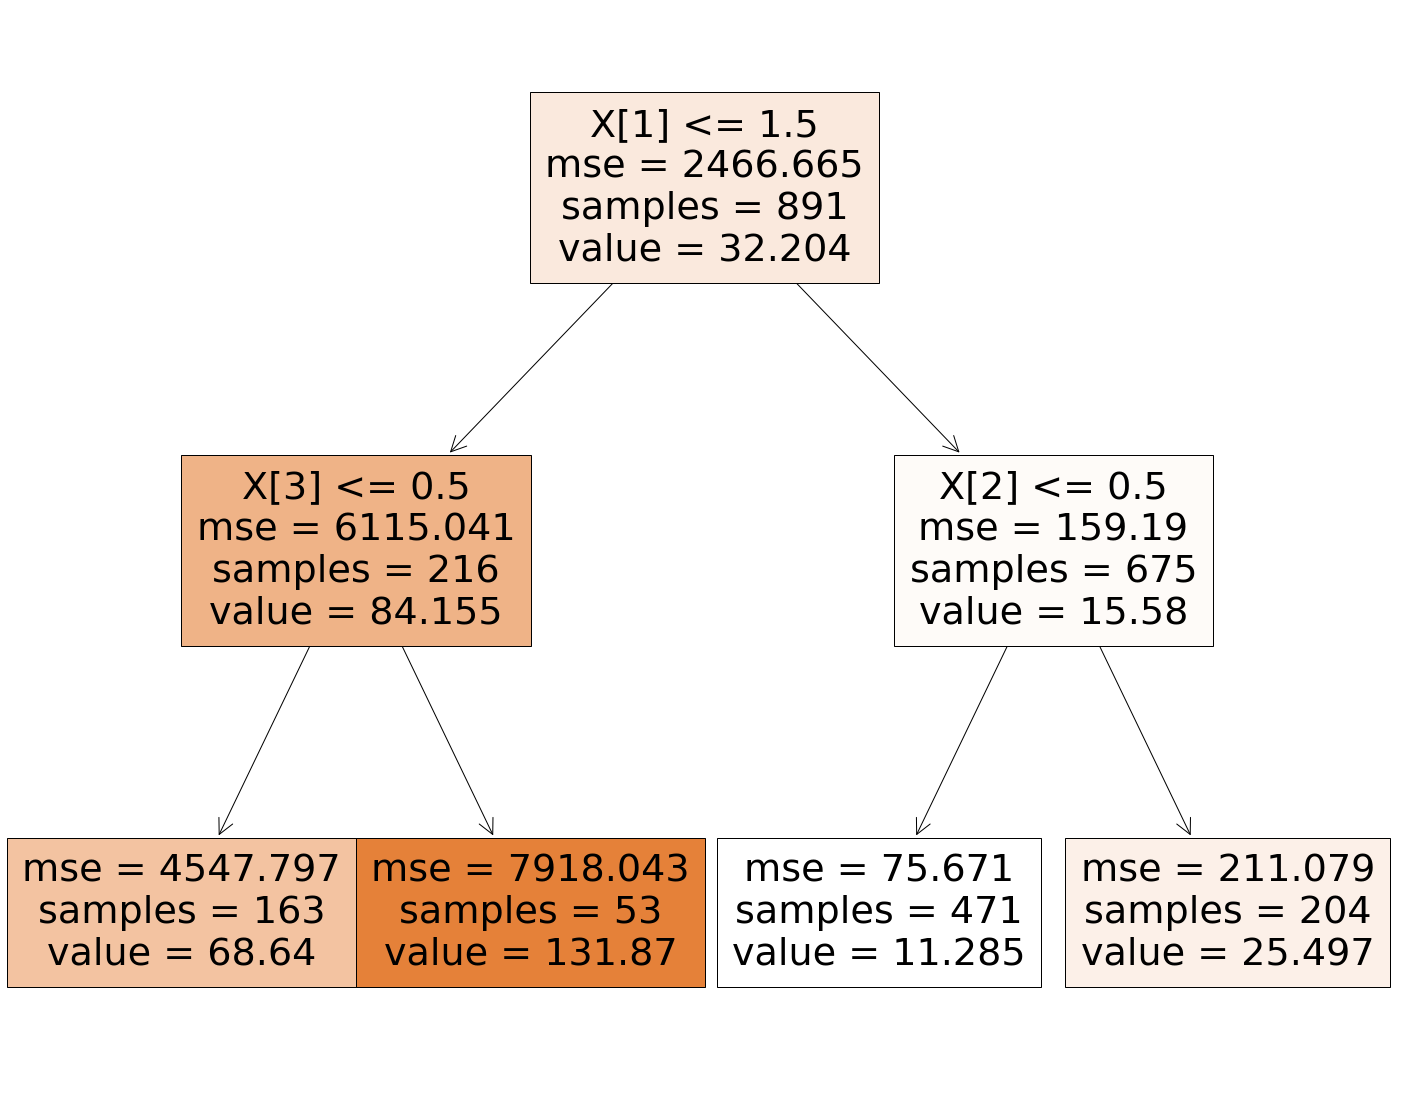

In [142]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(model, filled=True)